In [23]:
import numpy as np 
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [24]:
tickers = ['MINDTREE.NS']
start = "2015-08-01"
end = "2018-09-18"

df = pdr.get_data_yahoo(tickers,start, end)
#FilteredDF.plot(figsize=(20, 12),title="Stock Analysis",grid = True);


[*********************100%***********************]  1 of 1 downloaded


In [25]:
df['Adj Close'].bfill(inplace = True)
#NormalizedDF = df['Adj Close'].apply(lambda x: x/x[0])
#NormalizedDF.plot(figsize=(20, 12),title="Stock Analysis",grid = True);

In [26]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-03,641.950012,649.000000,635.275024,638.724976,604.846863,160016
2015-08-04,638.724976,641.000000,628.025024,636.599976,602.834473,259292
2015-08-05,637.799988,649.000000,636.799988,645.424988,611.191467,420374
2015-08-06,641.000000,659.875000,641.000000,648.924988,614.505676,611166
2015-08-07,648.924988,653.474976,642.825012,649.250000,614.813599,254920
2015-08-10,649.250000,683.224976,649.250000,677.125000,641.209961,672102
2015-08-11,685.000000,692.474976,681.000000,689.474976,652.904968,536796
2015-08-12,692.349976,703.349976,685.000000,699.525024,662.421875,518712
2015-08-13,701.000000,707.500000,685.150024,688.849976,652.313171,296132


In [27]:
RollingMeanFiltered_50d = df['Adj Close'].rolling(window = 50).mean()
RollingStdFiltered_50d = df['Adj Close'].rolling(window = 50).std()


In [28]:
upperBoiledBand = RollingMeanFiltered_50d + 2.1*RollingStdFiltered_50d
lowerBoiledBand = RollingMeanFiltered_50d - 2.1*RollingStdFiltered_50d

In [29]:
df['UBB'] = upperBoiledBand
df['LBB'] = lowerBoiledBand

In [30]:
#Create the "L14" column in the DataFrame
df['L14'] = df['Low'].rolling(window=14).min()

#Create the "H14" column in the DataFrame
df['H14'] = df['High'].rolling(window=14).max()

#Create the "%K" column in the DataFrame
df['%K'] = 100*((df['Adj Close'] - df['L14']) / (df['H14'] - df['L14']) )

#Create the "%D" column in the DataFrame
df['%D'] = df['%K'].rolling(window=3).mean()

In [31]:
df['Vol'] = df['Volume'].rolling(window=50).mean()

In [32]:
df

,Open,High,Low,Close,Adj Close,Volume,UBB,LBB,L14,H14,%K,%D,Vol
Date,,,,,,,,,,,,,
2015-08-03,641.950012,649.000000,635.275024,638.724976,604.846863,160016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-04,638.724976,641.000000,628.025024,636.599976,602.834473,259292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-05,637.799988,649.000000,636.799988,645.424988,611.191467,420374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-06,641.000000,659.875000,641.000000,648.924988,614.505676,611166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-07,648.924988,653.474976,642.825012,649.250000,614.813599,254920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-10,649.250000,683.224976,649.250000,677.125000,641.209961,672102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-11,685.000000,692.474976,681.000000,689.474976,652.904968,536796,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-12,692.349976,703.349976,685.000000,699.525024,662.421875,518712,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-13,701.000000,707.500000,685.150024,688.849976,652.313171,296132,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df.dropna(inplace = True)
df.reset_index(level=0,inplace= True)

In [34]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,UBB,LBB,L14,H14,%K,%D,Vol
0,2015-10-14,700.000000,712.500000,698.000000,704.375000,667.014648,307960,734.871494,586.434568,693.625000,801.200012,-24.736555,-22.340392,408991.36
1,2015-10-15,714.750000,715.200012,690.500000,701.775024,664.552673,1036086,734.117769,589.576525,690.500000,801.200012,-23.439317,-24.164739,426512.76
2,2015-10-16,735.000000,736.000000,707.174988,711.325012,673.596069,2643088,733.355378,593.169380,690.500000,788.650024,-17.222544,-21.799472,474188.68
3,2015-10-19,714.974976,727.450012,710.599976,725.125000,686.664185,478066,733.386987,596.156680,690.500000,788.650024,-3.908114,-14.856658,475342.52
4,2015-10-20,729.000000,742.500000,723.750000,738.299988,699.140320,545860,734.096260,598.832792,690.500000,788.650024,8.803177,-4.109160,474036.40
5,2015-10-21,740.000000,747.299988,730.000000,736.474976,701.211182,395782,734.744498,601.640458,690.500000,788.650024,10.913071,5.269378,476853.64
6,2015-10-23,742.500000,747.450012,732.924988,744.950012,709.280273,387204,736.689899,602.417870,690.500000,788.650024,19.134252,12.950167,471155.68
7,2015-10-26,745.000000,760.224976,745.000000,757.775024,721.491272,577280,739.603151,602.248069,690.500000,788.650024,31.575409,20.540911,471965.36
8,2015-10-27,759.000000,775.000000,756.599976,772.575012,735.582520,549920,743.639847,601.137799,690.500000,775.000000,53.352095,34.687252,472589.52
9,2015-10-28,775.500000,780.000000,755.700012,766.400024,729.703369,506516,746.911287,600.961967,690.500000,780.000000,43.802647,42.910050,476797.20


In [35]:
X_train = df.loc[:500,["Adj Close","UBB", "LBB","%K"
             ,"%D","Vol"]]

X_test = df.loc[500:720,["Adj Close","UBB", "LBB","%K"
             ,"%D","Vol"]]


In [36]:
Y = pd.DataFrame(df['Adj Close'].shift(-4))
Y_train = Y.loc[:500]
Y_test = Y.loc[500:720]

In [37]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=50)

model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [38]:
print(model.feature_importances_)

[0.74087653 0.01145701 0.22945566 0.00506774 0.00689178 0.00625129]


In [39]:
Y_pred = model.predict(X_test)

In [40]:
df_temp = pd.DataFrame(df['Date'])

In [41]:
df_temp = df_temp.join(Y_test,how='inner')
Result = df_temp.rename(columns = {'Adj Close' : 'Actual'})
Result['Predicted'] = pd.Series(Y_pred.tolist()).values
Result.set_index('Date',inplace = True)

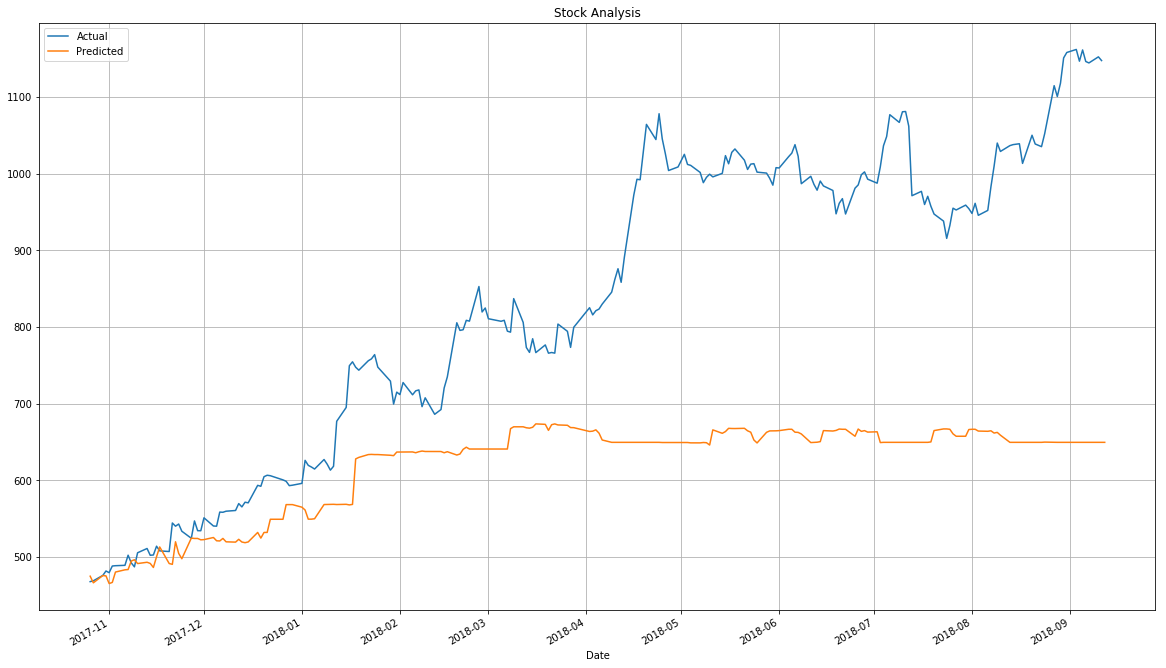

In [42]:
Result.plot(figsize=(20, 12),title="Stock Analysis",grid = True);

In [44]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [60]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train,Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [49]:
Y_pred = model.predict(X_test)

In [57]:
df_temp = pd.DataFrame(df['Date'])


In [51]:
df_temp = df_temp.join(Y_test,how='inner')
Result = df_temp.rename(columns = {'Adj Close' : 'Actual'})
Result['Predicted'] = pd.Series(Y_pred.tolist()).values
Result.set_index('Date',inplace = True)

In [58]:
Result

,Actual,Predicted
Date,,
2017-10-26,467.755219,[525.162671]
2017-10-27,468.843628,[521.8805908]
2017-10-30,475.868622,[547.9588258]
2017-10-31,481.656738,[625.6745788000001]
2017-11-01,479.430511,[615.0260558]
2017-11-02,488.137573,[653.543634]
2017-11-03,488.533325,[707.6427002]
2017-11-06,489.028046,[653.8673522]
2017-11-07,502.237030,[558.1384888]


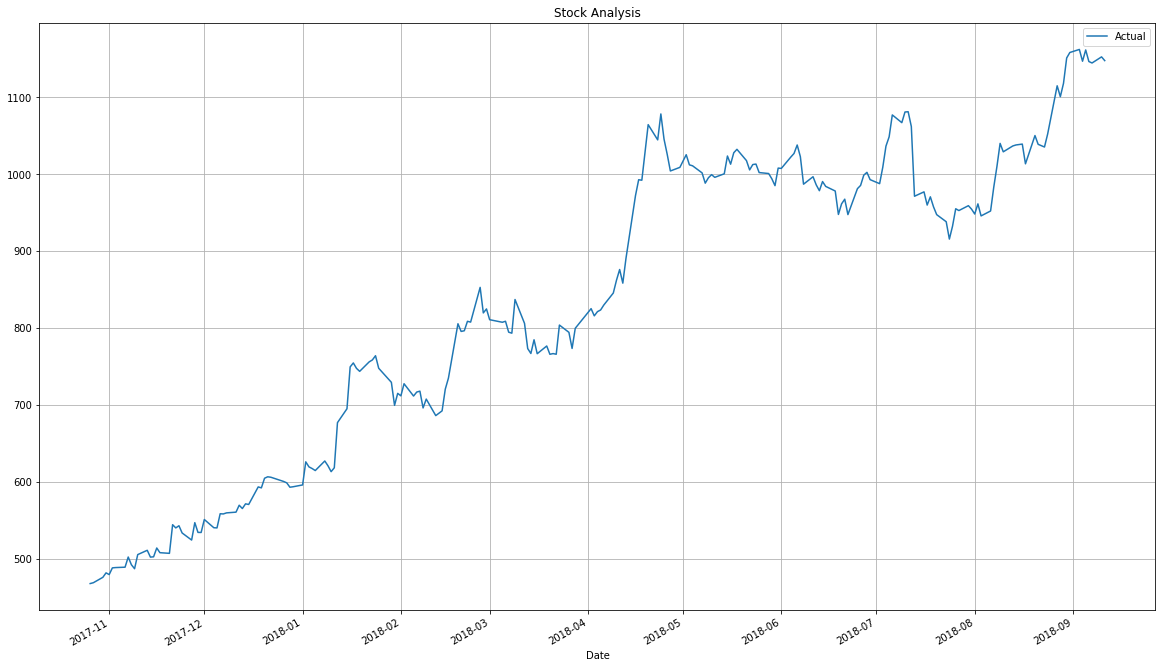

In [52]:
Result.plot(figsize=(20, 12),title="Stock Analysis",grid = True);